In [26]:
from google.colab import files
uploaded = files.upload()

Saving Lab Session Data.xlsx to Lab Session Data (1).xlsx


In [27]:
# ML Lab 15/07/2025

# A1

import pandas
import numpy as np

cols=["Customer","Candies (#)","Mangoes (Kg)","Milk Packets (#)","Payment (Rs)"]
fileOpen=pandas.read_excel("Lab Session Data.xlsx",sheet_name="Purchase data",usecols=cols)
fileOpen.head()
A=fileOpen[["Candies (#)","Mangoes (Kg)","Milk Packets (#)"]].values
C=fileOpen[["Payment (Rs)"]].values
print("A : ",A)
print("C : ",C)
print("Dimensionality of A : ",np.shape(A),"Dimensionality of C : ",np.shape(C))
print("Number of vectors : ",len(fileOpen))
print("Rank of A : ",np.linalg.matrix_rank(A))
inv=np.linalg.pinv(A)
X=inv @ C
print("Cost of Candy : ",X[0][0])
print("Cost of Mango : ",X[1][0])
print("Cost of Milk Packet : ",X[2][0])

A :  [[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
C :  [[386]
 [289]
 [393]
 [110]
 [280]
 [167]
 [271]
 [274]
 [148]
 [198]]
Dimensionality of A :  (10, 3) Dimensionality of C :  (10, 1)
Number of vectors :  10
Rank of A :  3
Cost of Candy :  0.9999999999999989
Cost of Mango :  54.99999999999999
Cost of Milk Packet :  18.0


In [28]:
# A2

import pandas
import numpy as np

cols=["Customer","Candies (#)","Mangoes (Kg)","Milk Packets (#)","Payment (Rs)"]
data=pandas.read_excel("Lab Session Data.xlsx",sheet_name="Purchase data",usecols=cols)
data["Customer Type"]=data["Payment (Rs)"].apply(lambda x: "Rich" if x>200 else "Poor")

with pandas.ExcelWriter("Lab Session Data.xlsx",engine="openpyxl",mode="a",if_sheet_exists="replace") as writeToExcel:
  data.to_excel(writeToExcel,sheet_name="Purchase data",index="False")
data.head()

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs),Customer Type
0,C_1,20,6,2,386,Rich
1,C_2,16,3,6,289,Rich
2,C_3,27,6,2,393,Rich
3,C_4,19,1,2,110,Poor
4,C_5,24,4,2,280,Rich


Mean :  1560.663453815261
Variance :  58732.365352539186
Mean on Wednesdays :  1550.706
Difference in Mean :  9.957453815261033
Mean in April :  1698.9526315789474
Difference in Mean :  -138.28917776368644
Probability of making loss over stock :  0.4979919678714859
Probability of making profit over stock in Wednesdays:  0.42
Conditional probability of making profit over stock in Wednesdays:  0.42


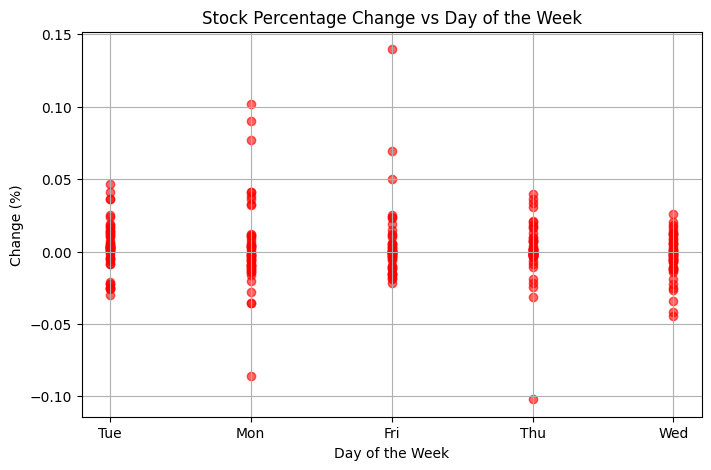

In [29]:
# A3

import pandas
import statistics
import matplotlib.pyplot as plot

cols=["Date","Month","Day","Price","Open","High","Low","Volume","Chg%"]
data=pandas.read_excel("Lab Session Data.xlsx",sheet_name="IRCTC Stock Price")
mean=statistics.mean(data["Price"])
variance=statistics.variance(data["Price"])
print("Mean : ",mean)
print("Variance : ",variance)

Wed_data=data[data["Day"]=="Wed"]
mean_wed=statistics.mean(Wed_data["Price"])
print("Mean on Wednesdays : ",mean_wed)
print("Difference in Mean : ",mean-mean_wed)

Apr_data=data[data["Month"]=="Apr"]
mean_apr=statistics.mean(Apr_data["Price"])
print("Mean in April : ",mean_apr)
print("Difference in Mean : ",mean-mean_apr)

data["Chg%"]=data["Chg%"].astype(str).str.replace("%","").astype(float)
total=len(data)
loss=data[data["Chg%"]<0].shape[0]
prob_loss=loss/total
print("Probability of making loss over stock : ",prob_loss)

wed_profit=Wed_data[Wed_data["Chg%"]>0].shape[0]
wed_total=len(Wed_data)
prob_wed_profit=wed_profit/wed_total
print("Probability of making profit over stock in Wednesdays: ",prob_wed_profit)

if wed_total>0:
  conditional_prob=wed_profit/wed_total
  print("Conditional probability of making profit over stock in Wednesdays: ",conditional_prob)

plot.figure(figsize=(8, 5))
plot.scatter(data["Day"], data["Chg%"], color='red', alpha=0.6)
plot.xlabel("Day of the Week")
plot.ylabel("Change (%)")
plot.title("Stock Percentage Change vs Day of the Week")
plot.grid(True)
plot.show()

In [30]:
# A4

import pandas
import matplotlib.pyplot as plot
import seaborn
from sklearn.preprocessing import LabelEncoder


data=pandas.read_excel("Lab Session Data.xlsx",sheet_name="thyroid0387_UCI")

# attributes and associated values
print("attributes and associated values")
data.info()

# missing values
data.isnull().sum()

# normalization using label and one-hot encoding
for col in data.columns:
    if data[col].dtype == object:
        data[col] = data[col].astype(str)
        data[col] = data[col].replace('?', pandas.NA)
        data[col] = data[col].fillna('Missing')
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

nominal_columns=["on thyroxine","query on thyroxine","on antithyroid medication","sick","pregnant","thyroid surgery","I131 treatment","query hypothyroid","query hyperthyroid","lithium","goitre","tumor","hypopituitary","psych","TSH measured","T3 measured","TT4 measured","T4U measured","FTI measured","TBG measured"]
data=pandas.get_dummies(data,columns=nominal_columns)

# Data range
data.describe()

data.head()

columns=["TSH","T3","TT4","T4U","FTI","TBG"]

# findin Outliers using Interquartile Range (IQR)
def find_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

outlier_summary = {}
for col in columns:
    outliers = find_outliers(data, col)
    outlier_summary[col] = {
        'Number of outlier rows': len(outliers),
        'Row indices where Outliers are present': outliers.index.tolist()
    }
print("Outliers details : ")
print(outlier_summary)

# mean and variance of numeric features
for c in columns:
  print("\nMean of ",c," : ",statistics.mean(data[c]))
  print("Variance of ",c," : ",statistics.variance(data[c]))
  print("Standard Deviation of ",c," : ",statistics.stdev(data[c]))

attributes and associated values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Record ID                  9172 non-null   int64 
 1   age                        9172 non-null   int64 
 2   sex                        9172 non-null   object
 3   on thyroxine               9172 non-null   object
 4   query on thyroxine         9172 non-null   object
 5   on antithyroid medication  9172 non-null   object
 6   sick                       9172 non-null   object
 7   pregnant                   9172 non-null   object
 8   thyroid surgery            9172 non-null   object
 9   I131 treatment             9172 non-null   object
 10  query hypothyroid          9172 non-null   object
 11  query hyperthyroid         9172 non-null   object
 12  lithium                    9172 non-null   object
 13  goitre                     917

In [31]:
# A5

import pandas

data=pandas.read_excel("Lab Session Data.xlsx",sheet_name="thyroid0387_UCI")

binary_cols = [
    'on thyroxine', 'query on thyroxine', 'on antithyroid medication',
    'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid',
    'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych',
    'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured',
    'FTI measured', 'TBG measured'
]

data_binary = data[binary_cols].replace({'t': 1, 'f': 0})

v1 = data_binary.iloc[0].values
v2 = data_binary.iloc[1].values

f11 = ((v1 == 1) & (v2 == 1)).sum()
f00 = ((v1 == 0) & (v2 == 0)).sum()
f10 = ((v1 == 1) & (v2 == 0)).sum()
f01 = ((v1 == 0) & (v2 == 1)).sum()

JC = f11 / (f01 + f10 + f11)
SMC = (f11 + f00) / (f11 + f00 + f10 + f01)

print("Jaccard Coefficient : ",JC)
print("Simple Matching Coefficient : ",SMC)


Jaccard Coefficient :  0.25
Simple Matching Coefficient :  0.85


/tmp/ipython-input-31-2518454470.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_binary = data[binary_cols].replace({'t': 1, 'f': 0})


In [32]:
# A6

import pandas
from sklearn.metrics.pairwise import cosine_similarity

sheets=["Purchase data","IRCTC Stock Price","thyroid0387_UCI","marketing_campaign"]
for sheet in sheets:
  data=pandas.read_excel("Lab Session Data.xlsx",sheet_name=sheet)
  features_taken=data.select_dtypes(include=["number"])
  features_filled = features_taken.fillna(0)
  vector1 = features_filled.iloc[0].values.reshape(1, -1)
  vector2 = features_filled.iloc[1].values.reshape(1, -1)
  similarity_matrix = cosine_similarity(vector1,vector2)
  print("\nCosine Similarity Measure for : ",sheet)
  print("\nCosine Similarity Matrix:", similarity_matrix)
  print("\nCosine Similarity (C1 vs C2):", similarity_matrix[0][0])


Cosine Similarity Measure for :  Purchase data

Cosine Similarity Matrix: [[0.99985355]]

Cosine Similarity (C1 vs C2): 0.9998535514235412

Cosine Similarity Measure for :  IRCTC Stock Price

Cosine Similarity Matrix: [[0.99999531]]

Cosine Similarity (C1 vs C2): 0.9999953124225921

Cosine Similarity Measure for :  thyroid0387_UCI

Cosine Similarity Matrix: [[1.]]

Cosine Similarity (C1 vs C2): 0.9999999999999999

Cosine Similarity Measure for :  marketing_campaign

Cosine Similarity Matrix: [[0.99871368]]

Cosine Similarity (C1 vs C2): 0.998713682807059



Cosine Similarity Measure for :  Purchase data

Cosine Similarity for 20 vectors: 0.9998535514235412


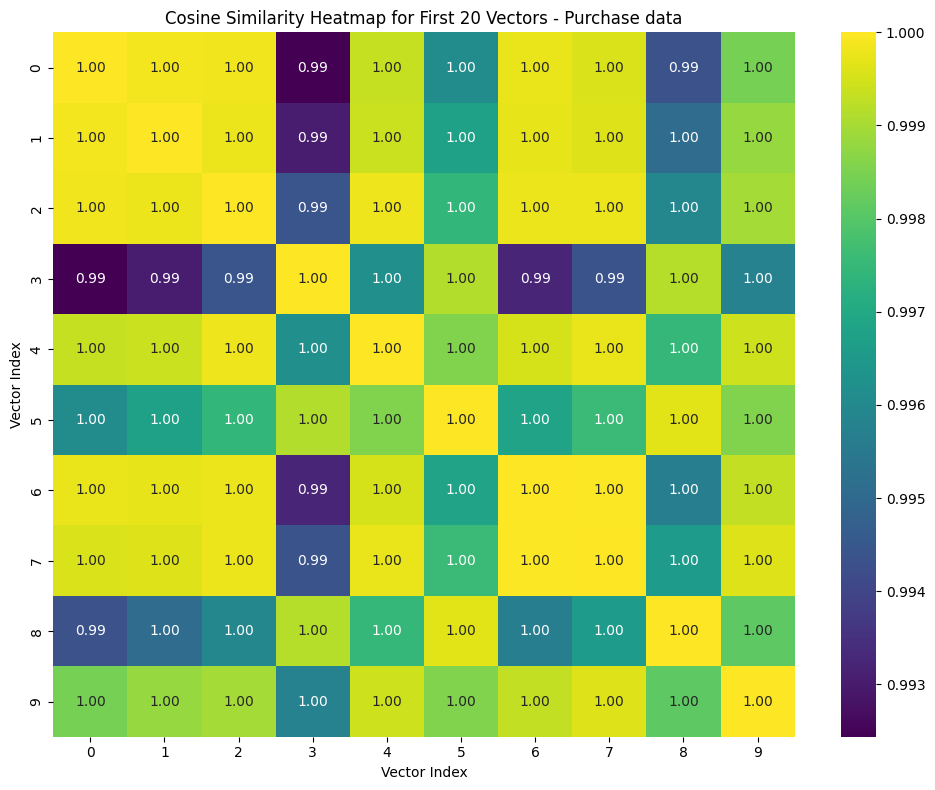


Cosine Similarity Measure for :  IRCTC Stock Price

Cosine Similarity for 20 vectors: 0.9999953124225923


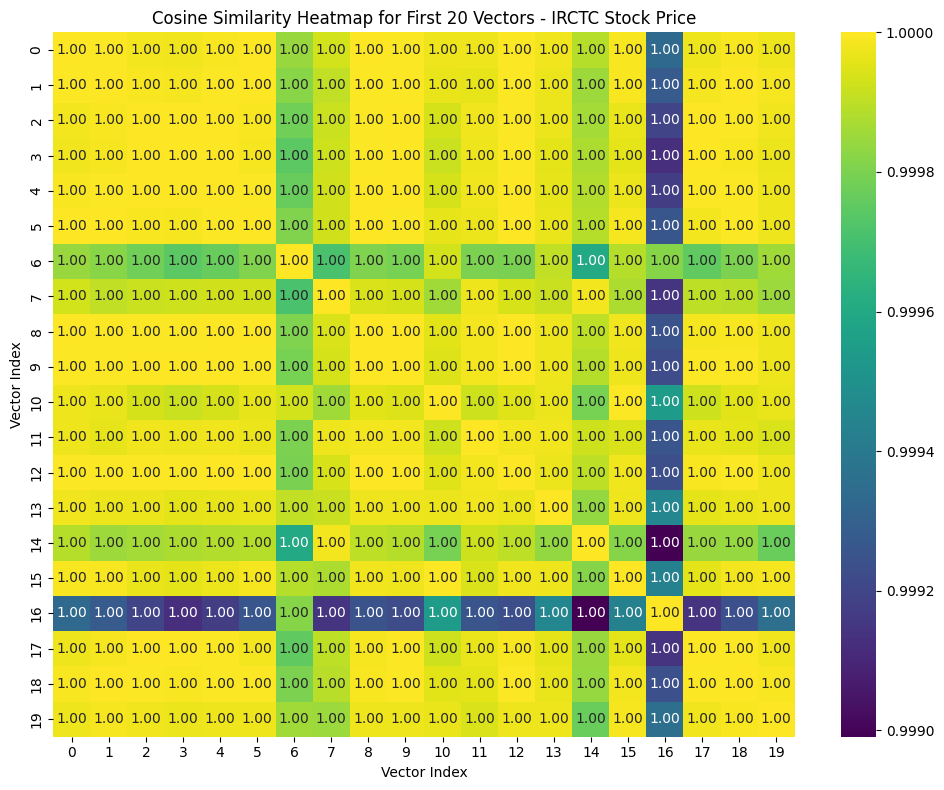


Cosine Similarity Measure for :  thyroid0387_UCI

Cosine Similarity for 20 vectors: 0.9999999999999999


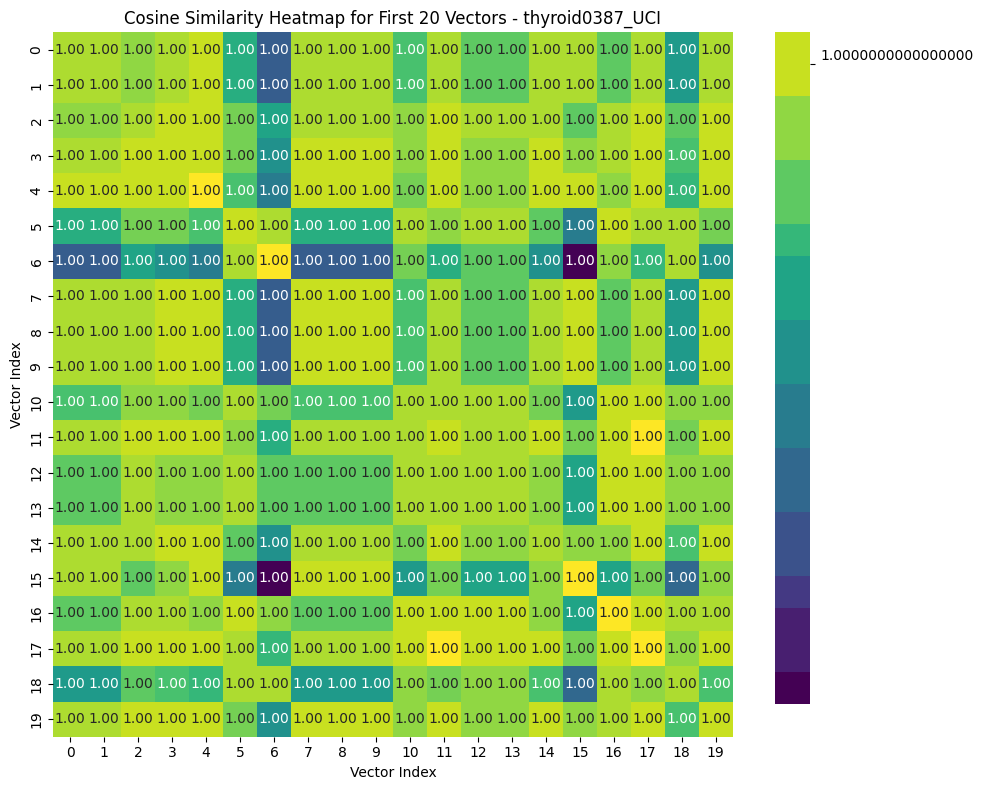


Cosine Similarity Measure for :  marketing_campaign

Cosine Similarity for 20 vectors: 0.9987136828070589


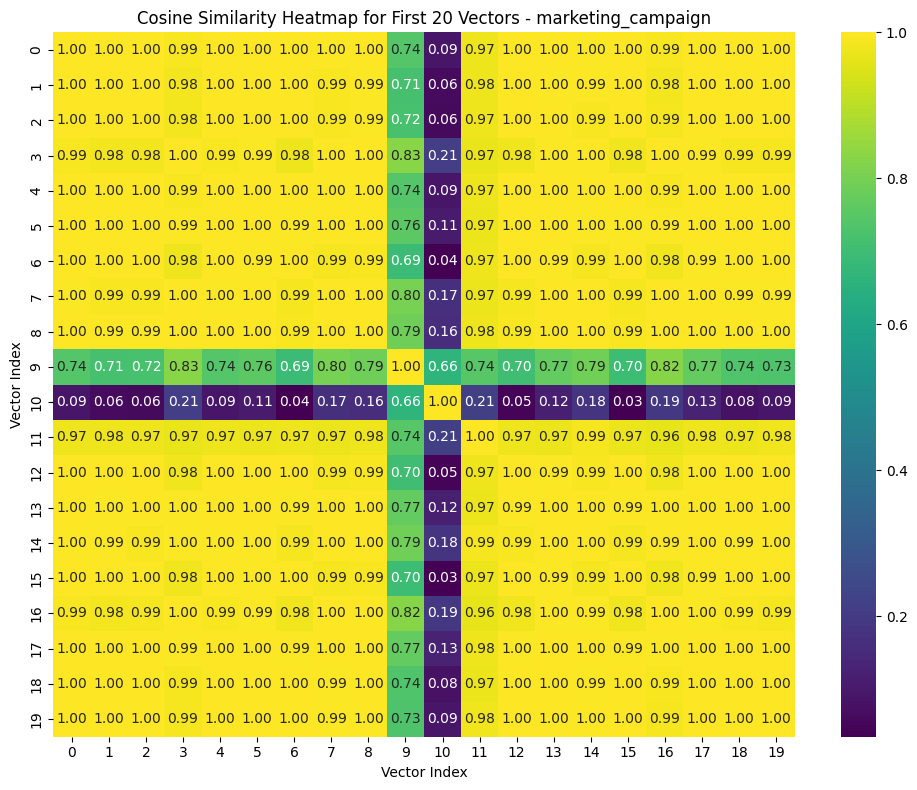

In [33]:
# A7

import pandas
import seaborn
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plot

sheets=["Purchase data","IRCTC Stock Price","thyroid0387_UCI","marketing_campaign"]
for sheet in sheets:
  data=pandas.read_excel("Lab Session Data.xlsx",sheet_name=sheet)
  features_taken=data.select_dtypes(include=["number"])
  features_filled = features_taken.fillna(0)
  vectors = features_filled.iloc[:20]
  similarity_matrix=cosine_similarity(vectors)
  print("\nCosine Similarity Measure for : ",sheet)
  print("\nCosine Similarity for 20 vectors:", similarity_matrix[0][1])

  plot.figure(figsize=(10, 8))
  seaborn.heatmap(similarity_matrix, cmap='viridis', annot=True, fmt=".2f")
  plot.title(f'Cosine Similarity Heatmap for First 20 Vectors - {sheet}')
  plot.xlabel("Vector Index")
  plot.ylabel("Vector Index")
  plot.tight_layout()
  plot.show()

In [34]:
# A8

import pandas
from sklearn.impute import SimpleImputer
import numpy

data = pandas.read_excel("Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")
columns = ["TSH", "T3", "TT4", "T4U", "FTI", "TBG"]

data = data.replace('?', numpy.nan)
for col in columns:
    data[col] = pandas.to_numeric(data[col], errors='coerce')
# Mean imputation
for col in columns:
    mean_imputer = SimpleImputer(strategy='mean')
    data[col] = mean_imputer.fit_transform(data[[col]])  # NOTE: double brackets [[col]] make it 2D
# Median imputation
for col in columns:
    median_imputer = SimpleImputer(strategy='median')
    data[col] = median_imputer.fit_transform(data[[col]])
# Mode imputation
for col in columns:
    mode_imputer = SimpleImputer(strategy='most_frequent')
    data[col] = mode_imputer.fit_transform(data[[col]])
print(data.head())

   Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured         TT4 T4U measured       T4U FTI measured         FTI  \
0            f  108.700305            f  0.976056            f  113.640746   
1            t

/tmp/ipython-input-34-1782531134.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace('?', numpy.nan)


In [38]:
# A9

import pandas
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

data1=pandas.read_excel("Lab Session Data.xlsx",sheet_name="thyroid0387_UCI")
data1 = data1.replace('?', numpy.nan)

# Min-Max Normalization
scaler = MinMaxScaler()
data1[["TSH", "T3", "TT4", "T4U", "FTI", "TBG"]] = scaler.fit_transform(data1[["TSH", "T3", "TT4", "T4U", "FTI", "TBG"]])
data1.head()

data2=pandas.read_excel("Lab Session Data.xlsx",sheet_name="thyroid0387_UCI")
data2 = data2.replace('?', numpy.nan)

# Z-Score Normalization
scaler = StandardScaler()
data2[["TSH", "T3", "TT4", "T4U", "FTI", "TBG"]] = scaler.fit_transform(data2[["TSH", "T3", "TT4", "T4U", "FTI", "TBG"]])
data2.head()

/tmp/ipython-input-38-3975818974.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data1 = data1.replace('?', numpy.nan)
/tmp/ipython-input-38-3975818974.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data2 = data2.replace('?', numpy.nan)


,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,NaN,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,0.514377,f,NaN,f,NaN,f,NaN,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,-0.896428,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,-0.183848,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,0.291205,other,S
